In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loaded /Users/kimberly/Documents/STAT4830/STAT-4830-GOALZ-project/data/processed_mesa/mesa-sleep-0001_epochs.npz
Data shape: (1439, 27, 7680) (epochs, channels, samples)
Labels shape: (1439,)
Inferred sampling rate: 256.00 Hz
Number of channels: 27
Expected channels: EEG1, EOG-L, EOG-R
Visualizing epoch 223 (Label: 2)


/var/folders/fq/t46mbxyj54j1d9t60j44v_j80000gn/T/ipykernel_85209/3004897975.py:46: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


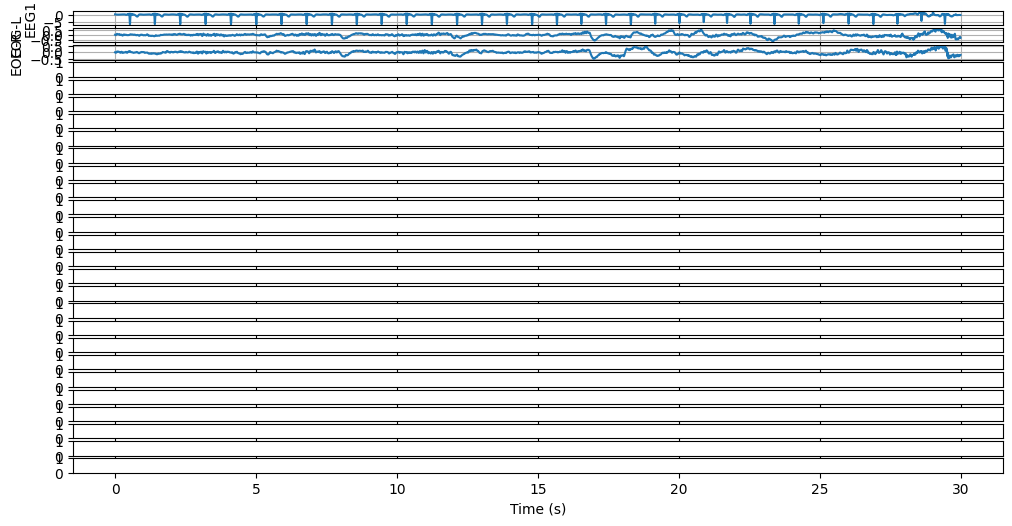

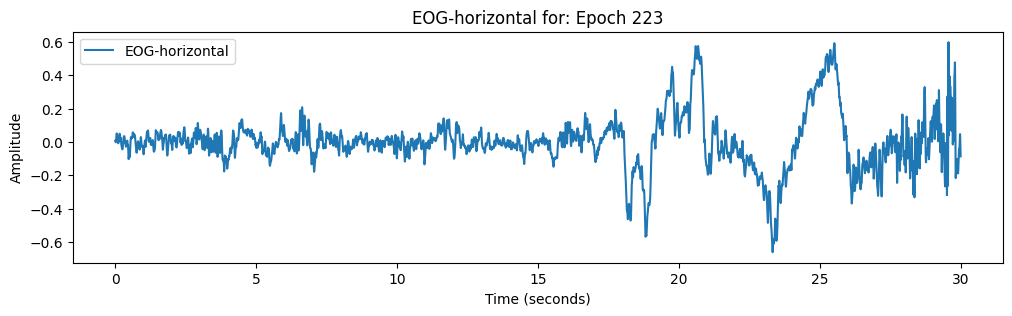

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Configuration
INSPECT_DIR = '/Users/kimberly/Documents/STAT4830/STAT-4830-GOALZ-project/data/processed_mesa'
example_file = os.path.join(INSPECT_DIR, 'mesa-sleep-0001_epochs.npz')

npz = np.load(example_file)
data = npz['data']  # shape (n_epochs, n_channels, n_samples)
labels = npz['labels']
# features = npz['features']  #c22 features

channel_names = ['EEG1', 'EOG-L', 'EOG-R']
channel_map = {name: idx for idx, name in enumerate(channel_names)}

print(f"Loaded {example_file}")
print(f"Data shape: {data.shape} (epochs, channels, samples)")
print(f"Labels shape: {labels.shape}")
# print(f"Features shape: {features.shape}")

n_epochs, n_channels, n_samples = data.shape

# Sampling rate from samples per epoch
epoch_length_sec = 30  # seconds
sampling_rate = n_samples / epoch_length_sec
print(f"Inferred sampling rate: {sampling_rate:.2f} Hz")

# Checking expected chanels used
print(f"Number of channels: {n_channels}")
print("Expected channels: EEG1, EOG-L, EOG-R")

epoch_idx = random.randint(0, n_epochs-1)
print(f"Visualizing epoch {epoch_idx} (Label: {labels[epoch_idx]})")

fig, axs = plt.subplots(n_channels, 1, figsize=(12, 6), sharex=True)
times = np.linspace(0, epoch_length_sec, n_samples)

for i, ch_name in enumerate(channel_names):
    axs[i].plot(times, data[epoch_idx, i, :])
    axs[i].set_ylabel(ch_name)
    axs[i].grid(True)

axs[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Compute EOG-horizontal
eog_l = data[epoch_idx, channel_map['EOG-L'], :]
eog_r = data[epoch_idx, channel_map['EOG-R'], :]
eog_horizontal = eog_l - eog_r

# Plot EOG-horizontal
plt.figure(figsize=(12, 3))
plt.plot(times, eog_horizontal, label='EOG-horizontal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'EOG-horizontal for: Epoch {epoch_idx}')
plt.legend()
plt.show()


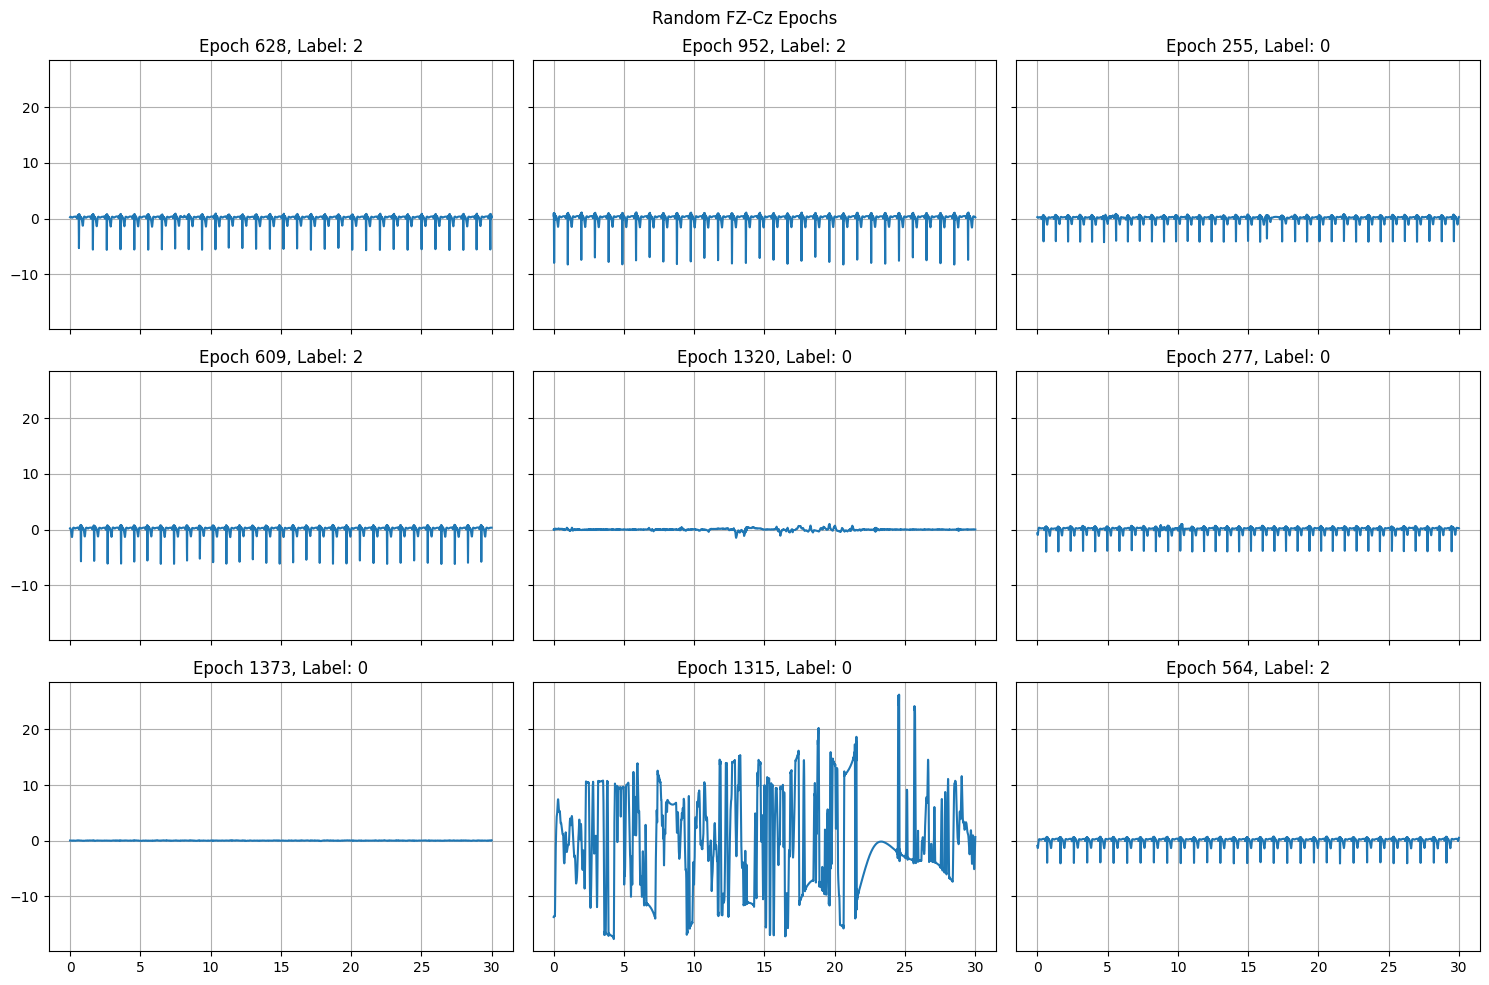

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
epoch_indices = random.sample(range(n_epochs), 9)

for ax, idx in zip(axs.flatten(), epoch_indices):
    ax.plot(times, data[idx, channel_map['EEG1'], :])
    ax.set_title(f"Epoch {idx}, Label: {labels[idx]}")
    ax.grid(True)

fig.suptitle('Random FZ-Cz Epochs')
plt.tight_layout()
plt.show()

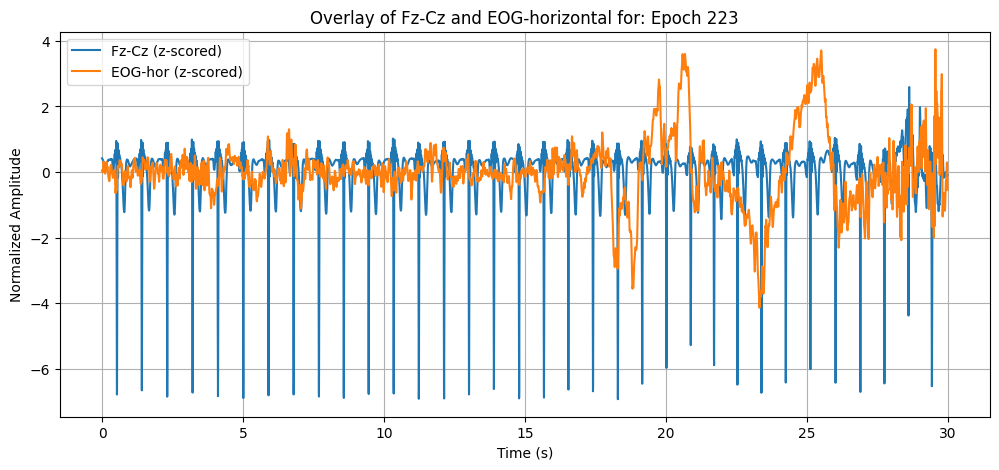

In [5]:
eeg1 = data[epoch_idx, channel_map['EEG1'], :]
eog_l = data[epoch_idx, channel_map['EOG-L'], :]
eog_r = data[epoch_idx, channel_map['EOG-R'], :]

plt.figure(figsize=(12, 5))
plt.plot(times, eeg1 / np.std(eeg1), label='Fz-Cz (z-scored)')
plt.plot(times, eog_horizontal / np.std(eog_horizontal), label='EOG-hor (z-scored)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.title(f'Overlay of Fz-Cz and EOG-horizontal for: Epoch {epoch_idx}')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
example_file = os.path.join(INSPECT_DIR, 'mesa-sleep-0001_epochs.npz')

npz = np.load(example_file)
data = npz['data']  # shape (n_epochs, n_channels, n_samples)
labels = npz['labels']
features = npz['features']  #c22 features

channel_names = ['EEG1', 'EOG-L', 'EOG-R']
channel_map = {name: idx for idx, name in enumerate(channel_names)}

print(f"Loaded {example_file}")
print(f"Data shape: {data.shape} (epochs, channels, samples)")
print(f"Labels shape: {labels.shape}")
# print(f"Features shape: {features.shape}")

n_epochs, n_channels, n_samples = data.shape

# Sampling rate from samples per epoch
epoch_length_sec = 30  # seconds
sampling_rate = n_samples / epoch_length_sec
print(f"Inferred sampling rate: {sampling_rate:.2f} Hz")

# Checking expected chanels used
print(f"Number of channels: {n_channels}")
print("Expected channels: EEG1, EOG-L, EOG-R")

epoch_idx = random.randint(0, n_epochs-1)
print(f"Visualizing epoch {epoch_idx} (Label: {labels[epoch_idx]})")

fig, axs = plt.subplots(n_channels, 1, figsize=(12, 6), sharex=True)
times = np.linspace(0, epoch_length_sec, n_samples)

for i, ch_name in enumerate(channel_names):
    axs[i].plot(times, data[epoch_idx, i, :])
    axs[i].set_ylabel(ch_name)
    axs[i].grid(True)

axs[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Compute EOG-horizontal
eog_l = data[epoch_idx, channel_map['EOG-L'], :]
eog_r = data[epoch_idx, channel_map['EOG-R'], :]
eog_horizontal = eog_l - eog_r

# Plot EOG-horizontal
plt.figure(figsize=(12, 3))
plt.plot(times, eog_horizontal, label='EOG-horizontal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'EOG-horizontal for: Epoch {epoch_idx}')
plt.legend()
plt.show()

KeyError: 'features is not a file in the archive'